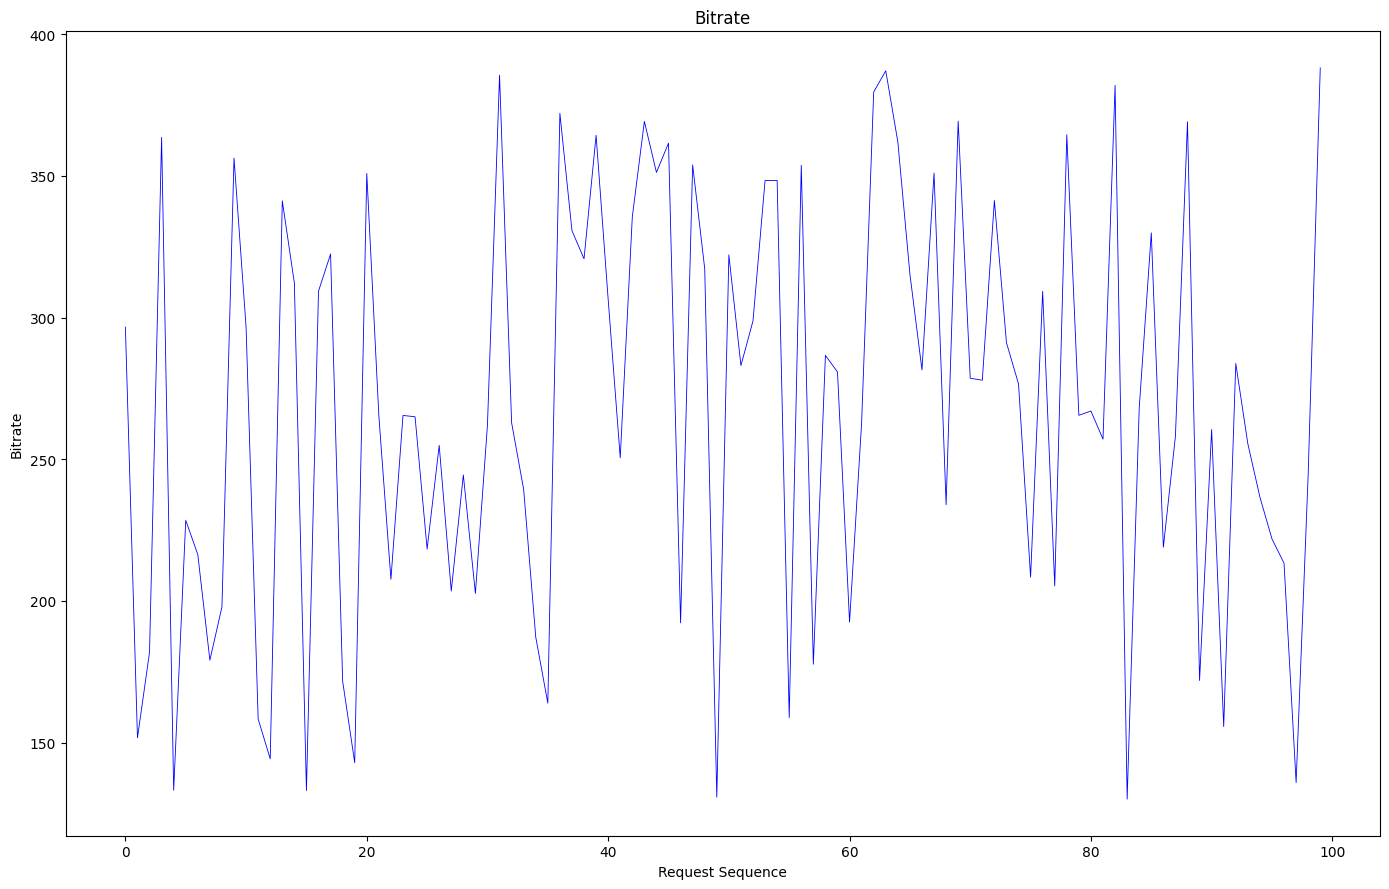

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

data = pd.read_csv("Euro28/request-set_1/requests.csv")

plt.figure(figsize=(14,9))
plt.plot(data["bitrate"], color="blue", linewidth=0.6)
plt.xlabel("Request Sequence")
plt.ylabel("Bitrate")
plt.title("Bitrate")
plt.tight_layout()
plt.show()

/var/folders/sh/p3p8zyzd6hz1mfjqmsf9m_b80000gn/T/ipykernel_2828/413809832.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


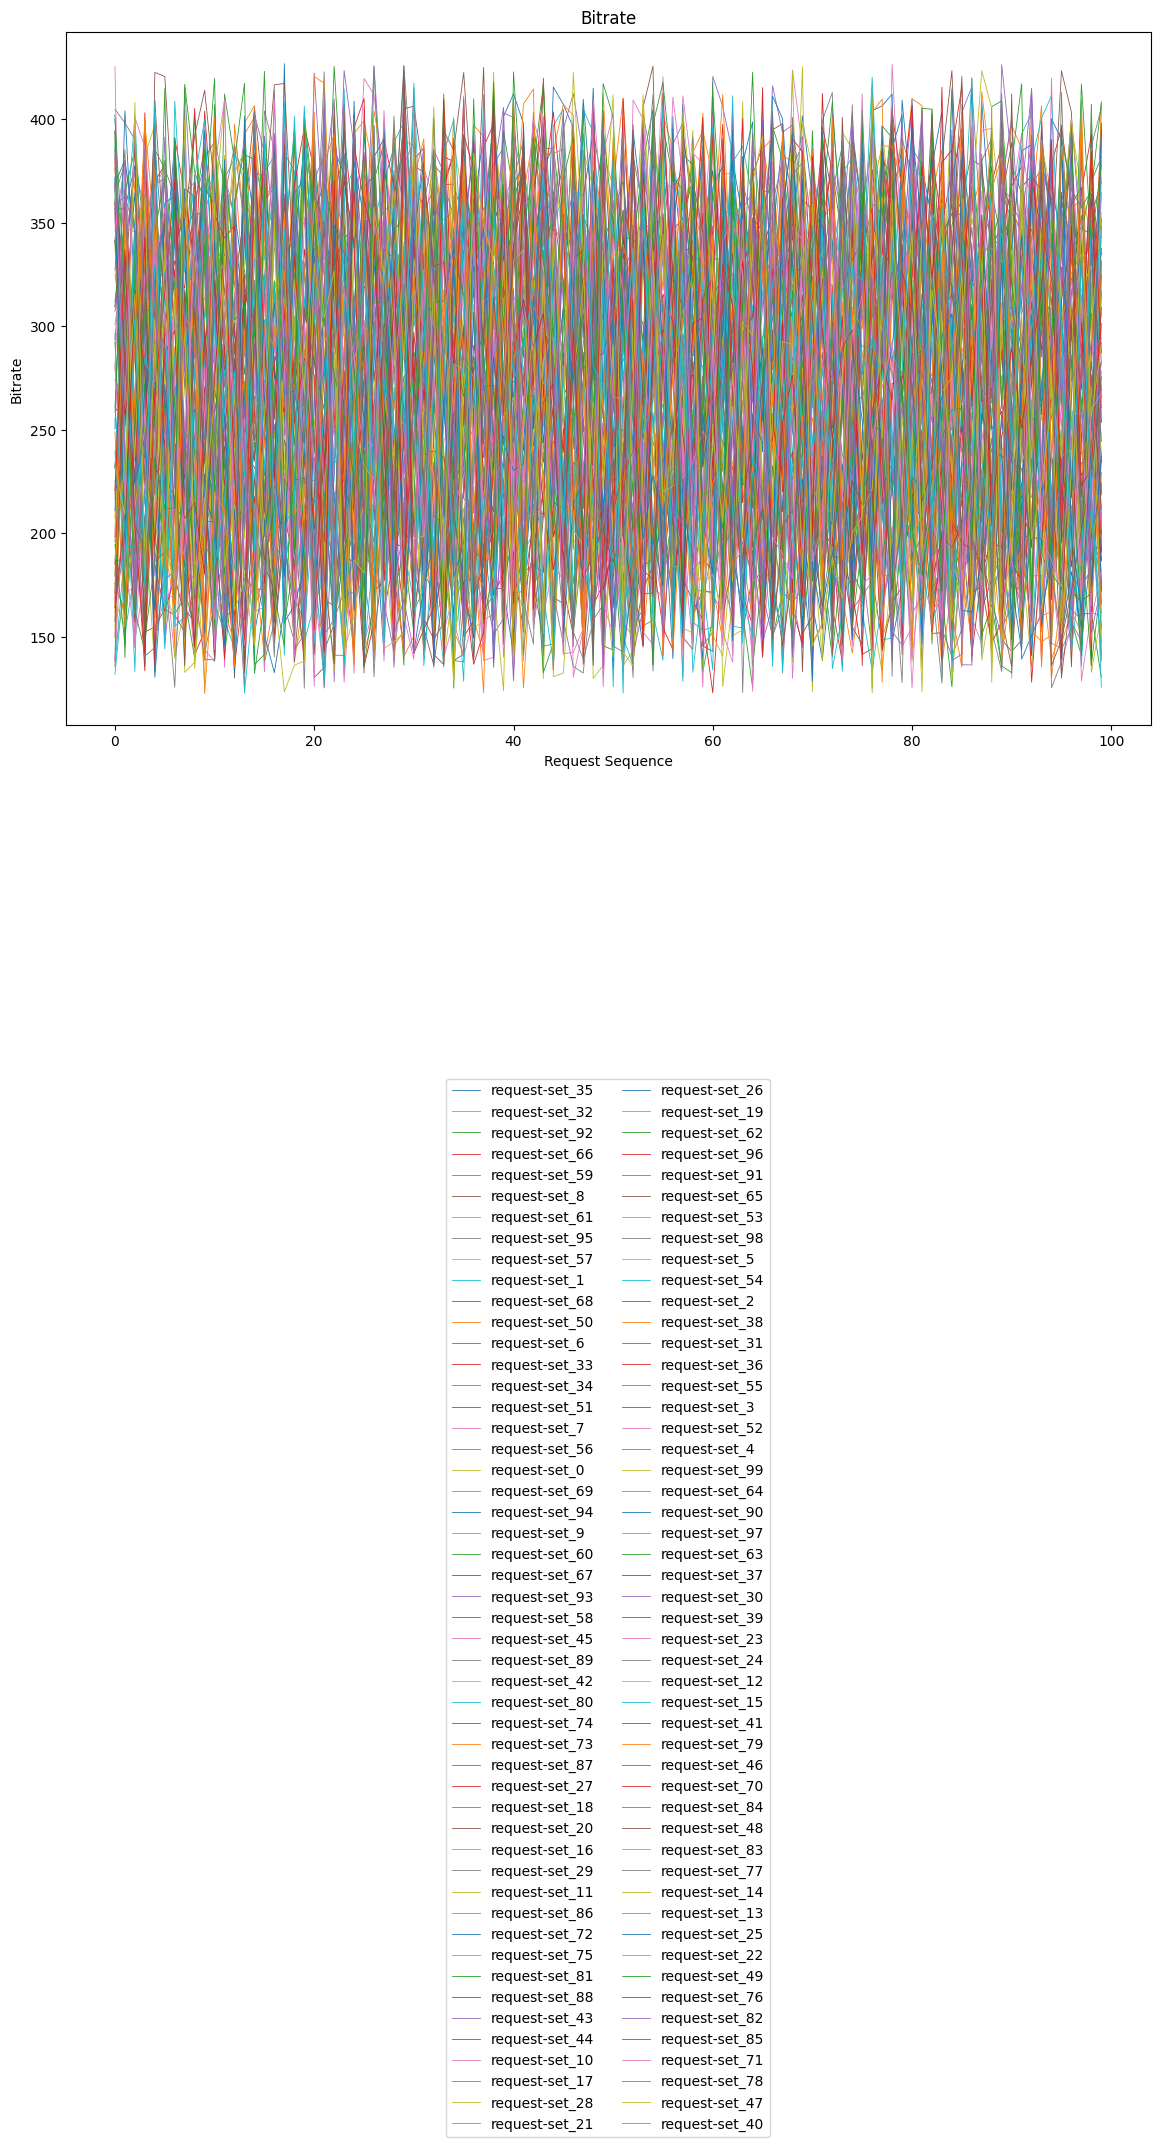

In [3]:
plt.figure(figsize=(14,9))

for i in os.listdir("Euro28"):
    data = pd.read_csv(f"Euro28/{i}/requests.csv")
    plt.plot(data["bitrate"], linewidth=0.6, label=i)
    plt.xlabel("Request Sequence")
    plt.ylabel("Bitrate")
    plt.title("Bitrate")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5), ncol=2)
plt.tight_layout()
plt.show()

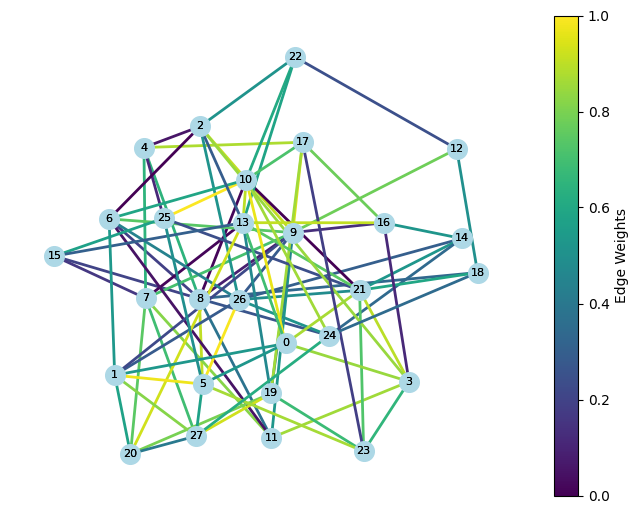

In [183]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load your data
data = pd.read_csv("Euro28/request-set_1/requests.csv")

# Create a weighted graph
G = nx.Graph()

source = np.array(data["source"])
destination = np.array(data["destination"])
weight = np.array(data["bitrate"])

# Normalize the weight values
normalized_weights = (weight - np.min(weight)) / (np.max(weight) - np.min(weight))

for i in range(len(data)):
    # Add weighted edges
    G.add_edge(source[i], destination[i], weight=normalized_weights[i])

# Set node attributes for visualization
node_size = 200  # Adjust the size of the nodes
node_color = 'lightblue'

# Create a colormap to represent edge weights
cmap = plt.get_cmap('viridis')

# Customize the layout
pos = nx.spring_layout(G, seed=42)  # Seed for reproducibility

# Draw the graph with edge colors
edge_colors = [cmap(w) for w in normalized_weights]
nx.draw(G, pos, with_labels=True, node_size=node_size, node_color=node_color, font_size=8, font_color='black',
        width=2, edge_color=edge_colors)

# Add labels to the nodes
node_labels = {node: node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8)

# Create a color bar for edge colors
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=weight.min(), vmax=weight.max()))  # Normalized between 0 and 1
sm.set_array([])

# Add color bar label
plt.colorbar(sm, label="Edge Weights")

plt.tight_layout()
plt.axis('off')  # Hide axis
plt.show()


In [138]:
def import_data(directory: str) -> None:
    data = []
    results = []

    for i in os.listdir(directory):
        d = np.genfromtxt(f"{directory}/{i}/requests.csv", delimiter=',', skip_header=1, dtype=float)
        data.append(d[:, 1:])
        results.append(np.genfromtxt(f"{directory}/{i}/results.txt", dtype=float, usecols=(1,)))

    return np.array(data), np.array(results)

data, results = import_data("Euro28")

data = data.mean(axis=1)
results = results[:, 3]

print(data.shape)
print(results.shape)


(100, 3)
(100,)


In [151]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(data, results, test_size=0.2)

mlp = MLPRegressor(hidden_layer_sizes=100, batch_size=20, max_iter=1000, activation="identity")
model = mlp.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Real data: {y_test}")
print(f"Predicted data: {y_pred}")


Real data: [204. 206. 202. 194. 196. 228. 206. 198. 212. 202. 202. 198. 208. 198.
 204. 208. 198. 200. 200. 200.]
Predicted data: [194.7938984  209.6898206  210.93531917 188.23465484 197.49601274
 220.90985304 207.93113574 200.87991306 225.26514268 204.4165403
 204.386732   205.67786768 214.3166485  196.72205073 199.53210405
 215.61393908 201.39841303 205.40360654 194.06805683 191.48819156]


In [159]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean square error: {mse}")

Mean square error: 39.514091511778176


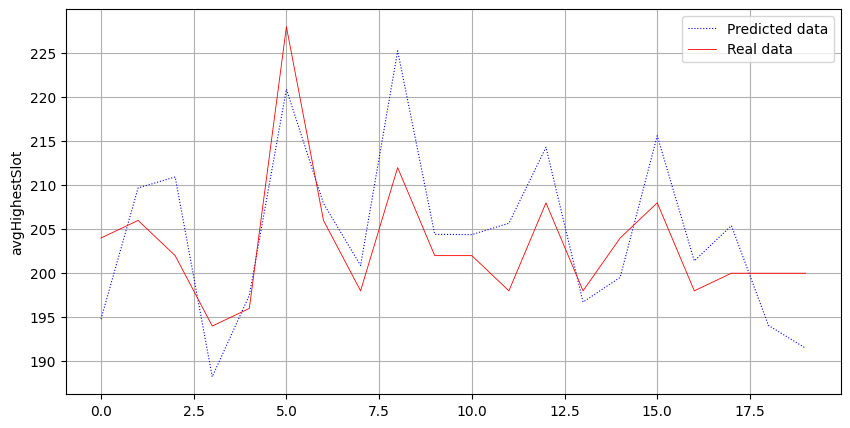

In [160]:
plt.figure(figsize=(10,5))
plt.plot(y_pred, color="blue", linewidth=0.8, linestyle="dotted", label="Predicted data")
plt.plot(y_test, color="red", linewidth=0.6, label="Real data")
plt.ylabel("avgHighestSlot")
plt.grid()
plt.legend()

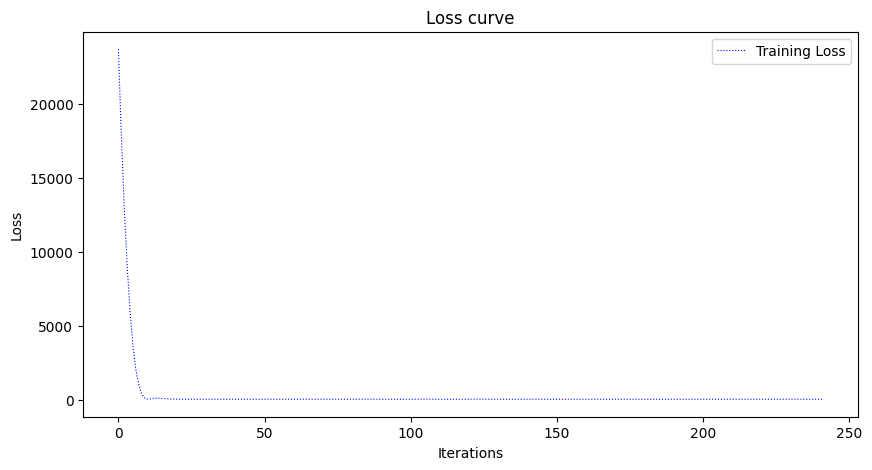

In [171]:
plt.figure(figsize=(10,5))
plt.plot(mlp.loss_curve_, color="blue", linestyle="dotted", linewidth=0.8, label="Training Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss curve")
plt.legend()